# PCA+逻辑回归预测检查者是否患糖尿病

In [2]:
#import data
import pandas as pd
import numpy as np
data = pd.read_csv('task2_data.csv')
print(data.shape)
data.head()

(600, 9)


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,9,122,56,0,0,33.3,1.114,33,1
1,2,112,66,22,0,25.0,0.307,24,0
2,1,103,30,38,83,43.3,0.183,33,0
3,1,138,82,0,0,40.1,0.236,28,0
4,9,72,78,25,0,31.6,0.280,38,0


In [3]:
#X y 赋值
X = data.drop(['label'],axis=1)
y = data.loc[:,'label']
X.head()
y.head()

0    1
1    0
2    0
3    0
4    0
Name: label, dtype: int64

In [4]:
print(X.shape,y.shape)

(600, 8) (600,)


In [5]:
# creat LR model , max iter = 1000 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=1000)
LR.fit(X,y)

LogisticRegression(max_iter=1000)

In [6]:
#predict using LR model
y_pre = LR.predict(X)

In [7]:
from sklearn.metrics import accuracy_score
LR_score = accuracy_score(y, y_pre)
LR_score

0.9183333333333333

In [8]:

#standarize the data (mean = 0, std =1)
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit_transform(X)
#z = (X - u) / std
print(X_norm)

[[ 1.61220139  0.09768458 -0.7354873  ...  0.26204583  2.01357116
   0.04951422]
 [-0.51645181 -0.20789804 -0.16980036 ... -0.79351368 -0.48113519
  -0.72549099]
 [-0.82054513 -0.4829224  -2.20627333 ...  1.53380426 -0.86446057
   0.04951422]
 ...
 [ 1.00401476  1.99229683  0.84843612 ...  0.54183268 -0.33275117
   0.73840774]
 [ 0.09173482 -0.26901457 -0.16980036 ...  0.08399964  0.02584355
  -0.29493254]
 [-1.12463844  0.55605851 -1.6405864  ...  1.50836909  5.642797
   0.04951422]]


In [9]:
glu_u = X.loc[:, 'glucose'].mean()
glu_std = X.loc[:, 'glucose'].std()
glu_norm_u =X_norm[:,1].mean()
glu_norm_std =X_norm[:,1].std()
print(glu_u,glu_std,glu_norm_u,glu_norm_std)

118.80333333333333 32.75167847546886 1.865174681370263e-16 0.9999999999999998


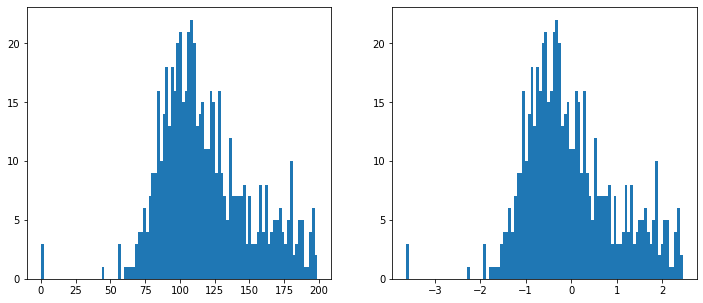

In [10]:

from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(12,5))
fig1_1 = plt.subplot(121)
plt.hist(X.loc[:,'glucose'],bins=100)

fig1_2 = plt.subplot(122)
plt.hist(X_norm[:,1],bins=100)
plt.show()

In [18]:

#pca分析
from sklearn.decomposition import PCA
pca = PCA(n_components=8)#8 components to keep
#处理标准化之后的数据
X_pca = pca.fit_transform(X_norm)
#计算分析后各成分的variance以及variance ratio
var = pca.explained_variance_
var_ratio = pca.explained_variance_ratio_
print(var)
print(var_ratio)
#如果我们保留的维度和原始数据一致，那么var_ratio的求和值为1，保留的维度越少，值也越小。
print('var ratio = ',sum(var_ratio))
#比如我们看前两项之和：
var_ratio[0]+var_ratio[1]

[2.15669029 1.74035262 1.03817655 0.87890467 0.75186028 0.61865346
 0.42446137 0.40425636]
[0.26913698 0.2171815  0.12955578 0.10967998 0.0938259  0.0772028
 0.05296924 0.05044782]
var ratio =  1.0


0.4863184794787808

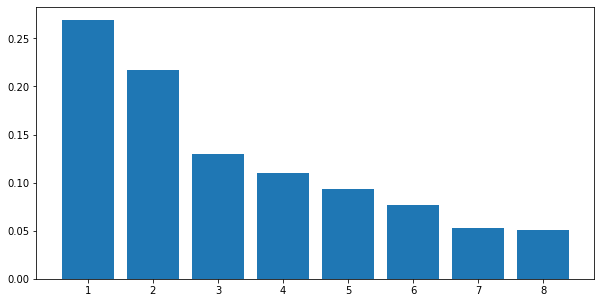

0.4863184794787808

In [17]:

#可视化方差比例
fig2 = plt.figure(figsize=(10,5))
plt.bar([1,2,3,4,5,6,7,8],var_ratio)
plt.show()
#plt.bar(names, values)

In [23]:

#数据降维到2维
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_norm)
print(X_pca2.shape,X_pca.shape)
var_ratio2 = pca2.explained_variance_ratio_
print(var_ratio2)

(600, 2) (600, 8)
[0.26913698 0.2171815 ]


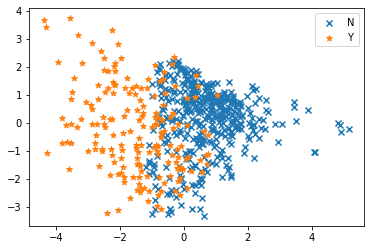

In [32]:
#降维数据可视化
fig3 = plt.figure()
plt.scatter(X_pca2[:,0][y == 0], X_pca2[:,1][y == 0],marker='x',label='N')
plt.scatter(X_pca2[:,0][y == 1], X_pca2[:,1][y == 1],marker='*',label = 'Y')
plt.legend()

In [35]:
#降维数据建立LR模型
LR2 = LogisticRegression()
LR2.fit(X_pca2,y)
y_pred = LR2.predict(X_pca2)
accuracy_pca = accuracy_score(y, y_pred)
print(accuracy_pca)
LR_score - accuracy_pca

0.8766666666666667


0.04166666666666663